#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

W0707 22:52:37.143430  5216 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

W0707 22:52:37.189559  5216 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 22:52:37.195510  5216 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
model.add(Dropout(rate=0.25))

W0707 22:52:37.232711  5216 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0707 22:52:37.248086  5216 deprecation.py:506] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0707 22:52:37.277847  5216 deprecation_wrapper.py:119] From C:\Users\Rosa\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

categorical_crossentropy

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 163s 4ms/step - loss: 1.3725 - acc: 0.5084 - val_loss: 1.4212 - val_acc: 0.5401
Epoch 2/10
37500/37500 [==============================] - 162s 4ms/step - loss: 1.3442 - acc: 0.5223 - val_loss: 1.3910 - val_acc: 0.5493
Epoch 3/10
37500/37500 [==============================] - 163s 4ms/step - loss: 1.3170 - acc: 0.5306 - val_loss: 1.3587 - val_acc: 0.5608
Epoch 4/10
37500/37500 [==============================] - 164s 4ms/step - loss: 1.2941 - acc: 0.5392 - val_loss: 1.3428 - val_acc: 0.5666
Epoch 5/10
37500/37500 [==============================] - 166s 4ms/step - loss: 1.2676 - acc: 0.5487 - val_loss: 1.3317 - val_acc: 0.5678
Epoch 6/10
37500/37500 [==============================] - 164s 4ms/step - loss: 1.2524 - acc: 0.5540 - val_loss: 1.3128 - val_acc: 0.5748
Epoch 7/10
37500/37500 [==============================] - 180s 5ms/step - loss: 1.2293 - acc: 0.5631 - val_loss: 1.2779 - 

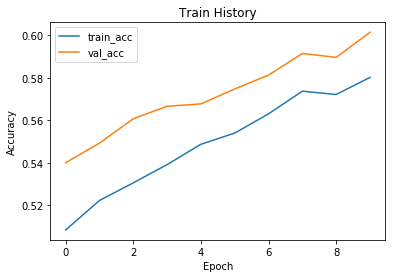

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

In [26]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print('accuracy=',scores[1])

50000/50000 [==============================] - 54s 1ms/step
accuracy= 0.61882


mean_squared_error

In [27]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 177s 5ms/step - loss: 0.0539 - acc: 0.5929 - val_loss: 0.0567 - val_acc: 0.6040
Epoch 2/10
37500/37500 [==============================] - 173s 5ms/step - loss: 0.0537 - acc: 0.5940 - val_loss: 0.0566 - val_acc: 0.6058
Epoch 3/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.0536 - acc: 0.5944 - val_loss: 0.0566 - val_acc: 0.6026
Epoch 4/10
37500/37500 [==============================] - 175s 5ms/step - loss: 0.0536 - acc: 0.5930 - val_loss: 0.0565 - val_acc: 0.6042
Epoch 5/10
37500/37500 [==============================] - 173s 5ms/step - loss: 0.0536 - acc: 0.5947 - val_loss: 0.0564 - val_acc: 0.6083
Epoch 6/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.0535 - acc: 0.5949 - val_loss: 0.0563 - val_acc: 0.6061
Epoch 7/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.0534 - acc: 0.5964 - val_loss: 0.0563 - 

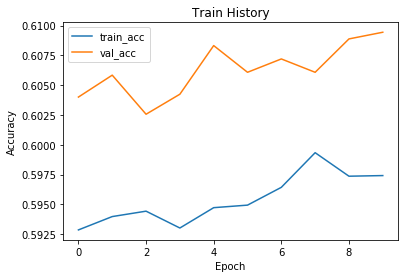

In [28]:
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

In [29]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print('accuracy=',scores[1])

50000/50000 [==============================] - 45s 900us/step
accuracy= 0.62782


binary_crossentropy

In [30]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)    

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 174s 5ms/step - loss: 0.1812 - acc: 0.9284 - val_loss: 0.1920 - val_acc: 0.9239
Epoch 2/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.1809 - acc: 0.9286 - val_loss: 0.1919 - val_acc: 0.9238
Epoch 3/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.1804 - acc: 0.9287 - val_loss: 0.1921 - val_acc: 0.9242
Epoch 4/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.1799 - acc: 0.9288 - val_loss: 0.1918 - val_acc: 0.9238
Epoch 5/10
37500/37500 [==============================] - 172s 5ms/step - loss: 0.1799 - acc: 0.9290 - val_loss: 0.1909 - val_acc: 0.9242
Epoch 6/10
37500/37500 [==============================] - 174s 5ms/step - loss: 0.1789 - acc: 0.9297 - val_loss: 0.1909 - val_acc: 0.9243
Epoch 7/10
37500/37500 [==============================] - 173s 5ms/step - loss: 0.1792 - acc: 0.9293 - val_loss: 0.1906 - 

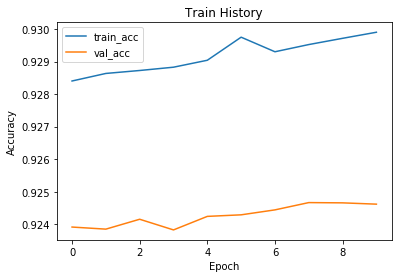

In [31]:
#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

In [32]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print('accuracy=',scores[1])

50000/50000 [==============================] - 45s 905us/step
accuracy= 0.9264699816513061


### 結論
模型準確率結果：binary_crossentropy > mean_squared_error > categorical_crossentropy

categorical_crossentropy=0.61882

mean_squared_error=0.62782

binary_crossentropy=0.9264699816513061
